# Unsupervised ML
* ML has bee categories in 3 parts *Supervised, unsupervised and rainforment*

**Unsupervised**
* In supervised we give labeled data i.e input labled as feature and output as columns. So machine know that it should target the output using the input(independent) ex: y=mx+c
* So *Unsupervised* woks on unlabeled data were we only get columns and row where we need to catagories them into clusters
* Ex: 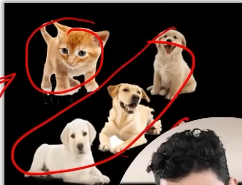
* Here is a data of animals so we need to catagories them into their features whivh results in cat and dog 

**How does it divides**
* This is a unlabeled data 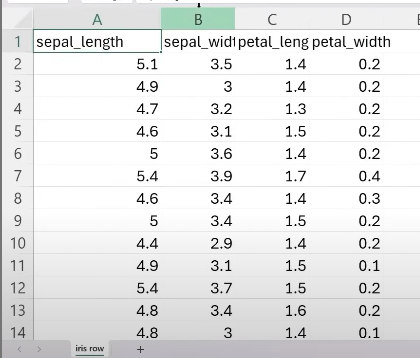
* We need to group them as per the features by recognising the pattern
* **Steps**
* 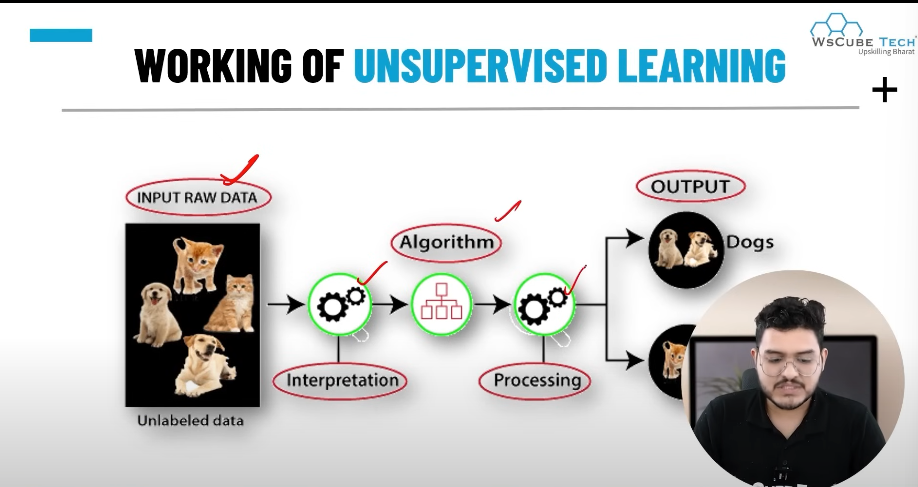
* *Input raw Data* : Takes the raw data as input
* *Interpreatation* : Recognises the pattern
* *Algothim* : Apply Algorithm
* *Processing* : Divides them into output

**Types of Unsuperviesd**
1) Clustering : Diveds raw data into clusters
2) Assosiation : Arrange them into systemetic arrangement i.e one after the other (in order)

**Algorithms**
1) K-mean clustering
2) Hierarchal clustering
3) DBSCAN clustering
4) Apriori algorithm
5) Principle Component Analysis (PCA)

# K Mean clustering

* **Clustering** : Means grouping values wrt features 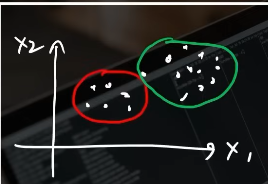
* EX: in gallery when we search their it shows  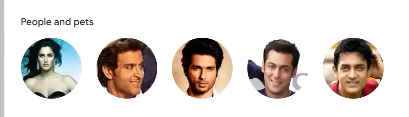 like this.

* **K-mean** : Clustering helps to group unlabeled daataset into different clusters
* Were **K** defines the number of pre-defined clusters the algorithm has to create
* **Mean** refer to the centroids of the clusters.

**Process**
* It takes 'k' random or starting rows and makes it as a centroid
* Then iterates over points and add the point in way that
* which is nearer to the mean (centroid)
* Thed distance is calculated by Ecludian 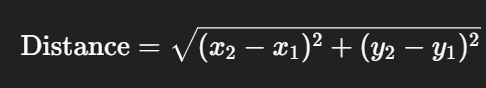
* centroid is updated by mean of the points 

**How to know value of k i.e no of groups**
* **Elbow Method** used to find number best optimal number of clusters using **WCSS** method which stands for (Within Cluster Sum of Squares) which defines the total variation within a cluster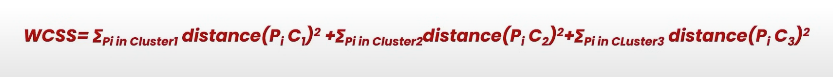
* 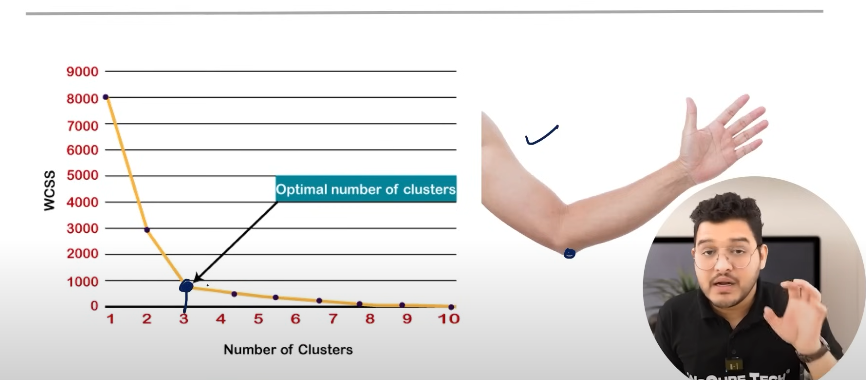

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r"D:\Data Science\Datasets\Iris.csv")
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [12]:
data.drop(columns = ['Species','Id'], inplace=True)

In [13]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Note : As K-mean clustering only works on Linearly saparable data  
So check wether this rows are linearly saparable

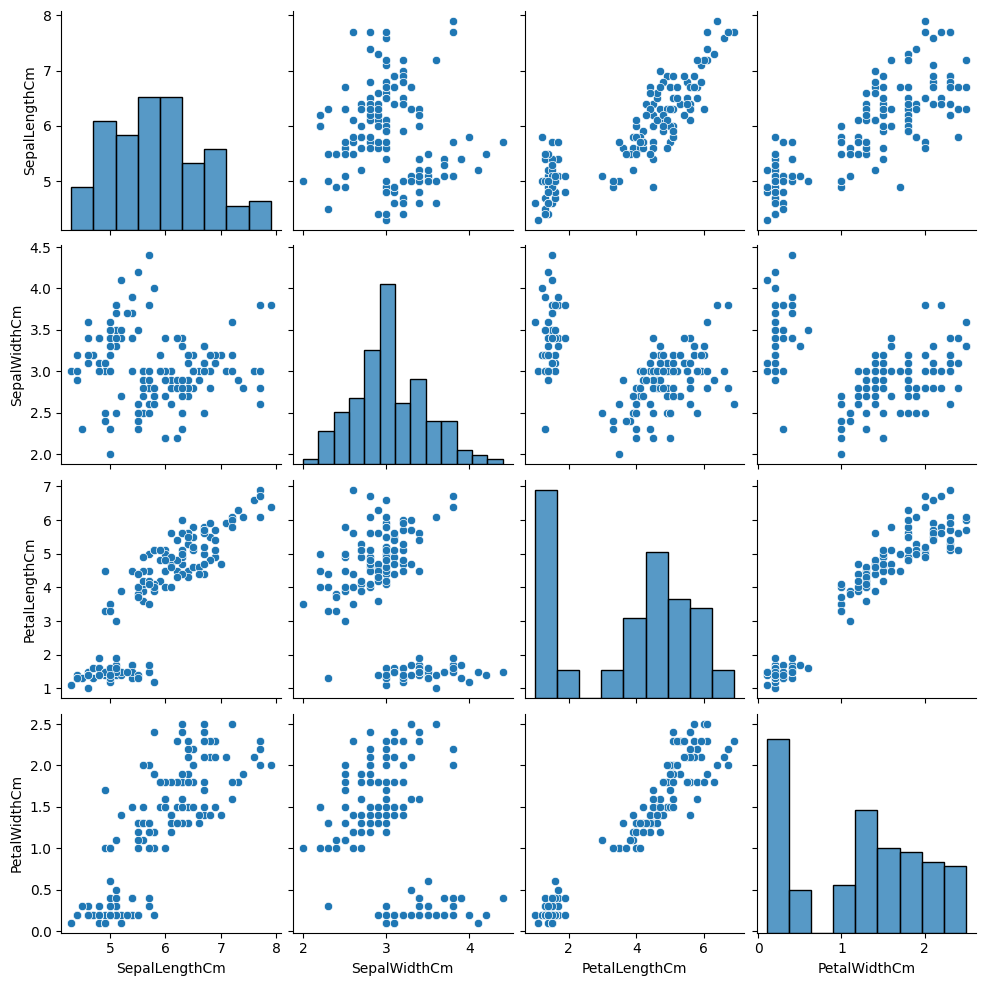

In [15]:
sns.pairplot(data=data)

* Yes this rows are linearly saparable

* Now we need to find number of best cluster through Elbow Method

In [16]:
from sklearn.cluster import KMeans

As we dont know how many number of clauster to put so we will put a loop for around 20 clusters and pick the best one out of it

In [19]:
wcss =[]
for i in range (2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data)
    wcss.append(km.inertia_) #this gives the value of WCSS

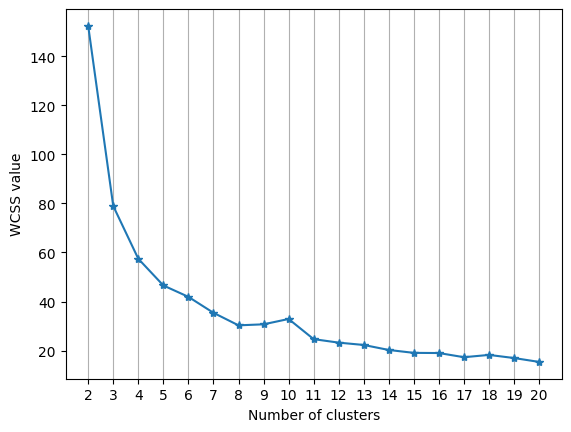

In [30]:
plt.plot([i for i in range (2,21)], wcss, marker='*')
plt.xticks([i for i in range (2,21)])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(axis='x')

So Wlbow point is 3  
Therfore best cluster numeber (k) is = 3

In [33]:
kmn = KMeans(n_clusters=3)
data['Predicted'] = kmn.fit_predict(data)

In [34]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


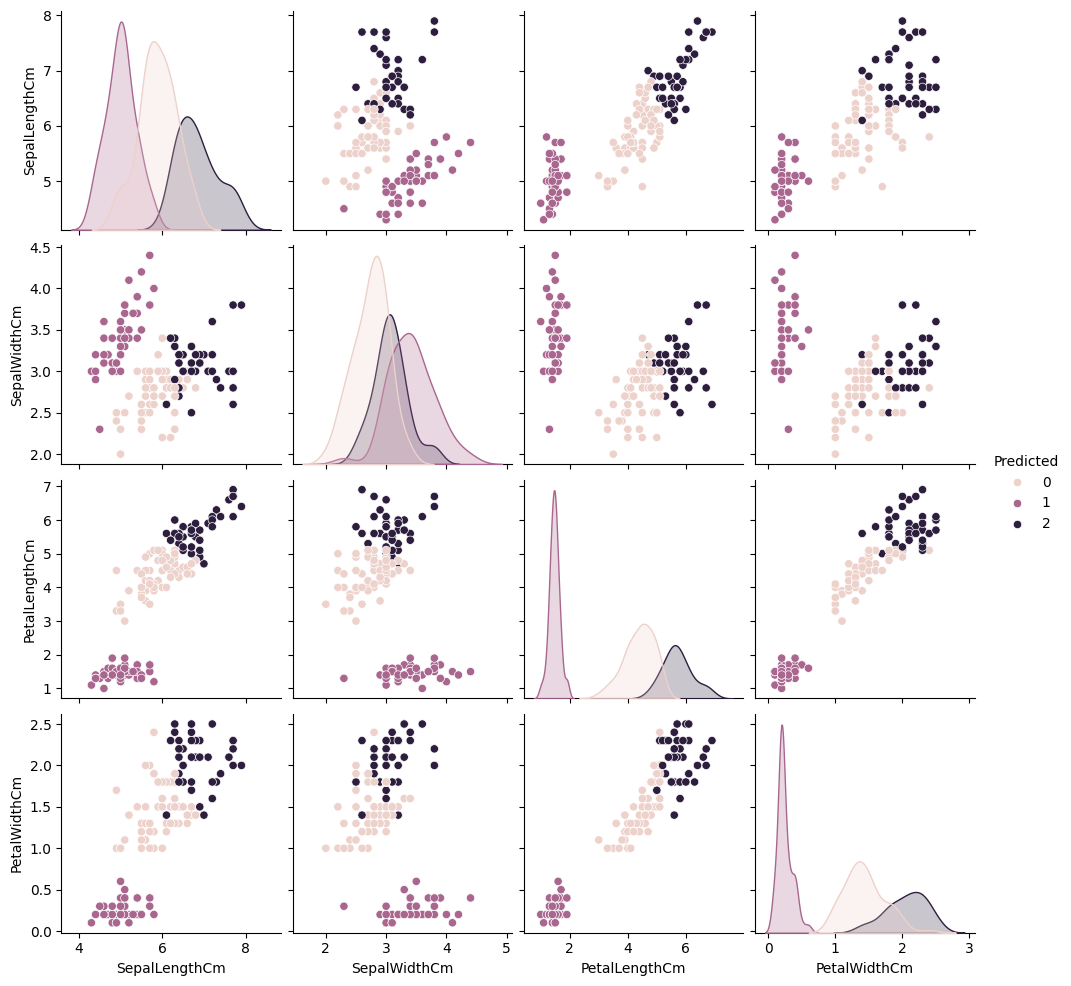

In [35]:
sns.pairplot(data=data, hue='Predicted')

Now compare that with original data

In [38]:
original = pd.read_csv(r"D:\Data Science\Datasets\Iris.csv")
original.drop(columns='Id', inplace=True)

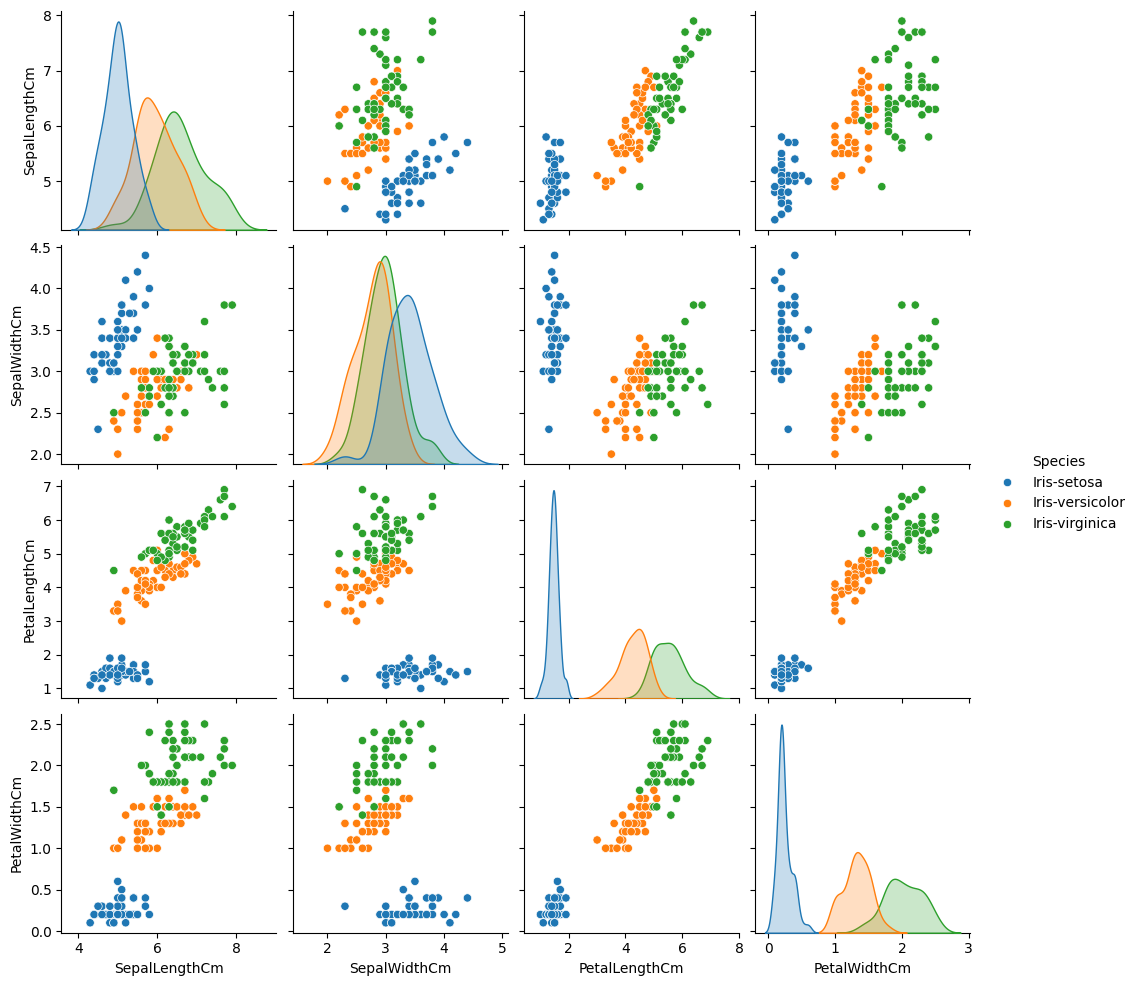

In [39]:
sns.pairplot(data=original, hue='Species')